## Distribution of firm size firms

-------------------------

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px

pd.options.display.max_colwidth = 200
pd.set_option('display.max_columns', None)

---------------

### Load Compustat data

In [2]:
df= pd.read_csv("data/compustat_from_1990.csv")
df['sic1']= (df['sich']/1000).astype(int).astype(str)
df=df[['conm', 'gvkey', 'tic', 'fyear', 'at', 'ni', 'sale', 'mv', 'sic1']]
df['lag_at']= df.groupby('gvkey')['at'].shift(1)
df['ROA']= df['ni'] / df['lag_at']
print(df.shape)
df.head()

(211983, 11)


,conm,gvkey,tic,fyear,at,ni,sale,mv,sic1,lag_at,ROA
0,AAR CORP,1004,AIR,1990,379.958,14.801,466.542,224.460360,5,NaN,NaN
1,AAR CORP,1004,AIR,1991,395.351,10.020,422.657,204.699595,5,379.958,0.026371
2,AAR CORP,1004,AIR,1992,365.151,0.283,382.780,214.663477,5,395.351,0.000716
3,AAR CORP,1004,AIR,1993,417.626,9.494,407.754,228.648720,5,365.151,0.026000
4,AAR CORP,1004,AIR,1994,425.814,10.463,451.395,243.405235,5,417.626,0.025054


In [3]:
df.dropna(inplace=True)
df= df[df['ROA'].abs()<0.5]
df= df[df['sale']>0]
df= df[df['at']>0]
df= df[df['mv']>0]
df.shape

(143046, 11)

---------------

### Keep firms without missing obs and SIC change

In [4]:
df_N= df.groupby('gvkey').agg({'gvkey':'count', 'sic1':'nunique'}).rename(columns={'gvkey':'N', 'sic1':'ind_count'}).reset_index()
df_N.head()

,gvkey,N,ind_count
0,1004,30,1
1,1009,4,1
2,1011,4,1
3,1013,19,1
4,1017,4,1


In [5]:
df_to_filter= df_N[(df_N.ind_count==1) & (df_N.N==df_N.N.max())]
balance_gvkey_list= list(df_to_filter.gvkey)
len(balance_gvkey_list)

585

In [6]:
df= df[df.gvkey.isin(balance_gvkey_list)]
df.shape

(17550, 11)

<AxesSubplot:>

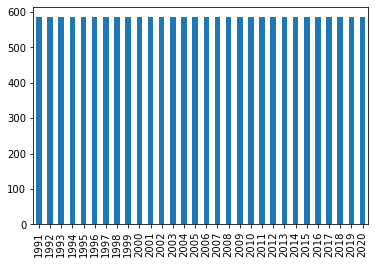

In [7]:
df.fyear.value_counts().sort_index().plot(kind='bar')

Balanced panel is confirmed.

---------------

### Keep the largest 100 unique firms

In [8]:
df_2020= df[df.fyear==2020]
gvkey_100_list= list(df_2020.sort_values('mv', ascending= False).head(100)['gvkey'])
df=df[df.gvkey.isin(gvkey_100_list)]
df.shape

(3000, 11)

---------------

## Visualization

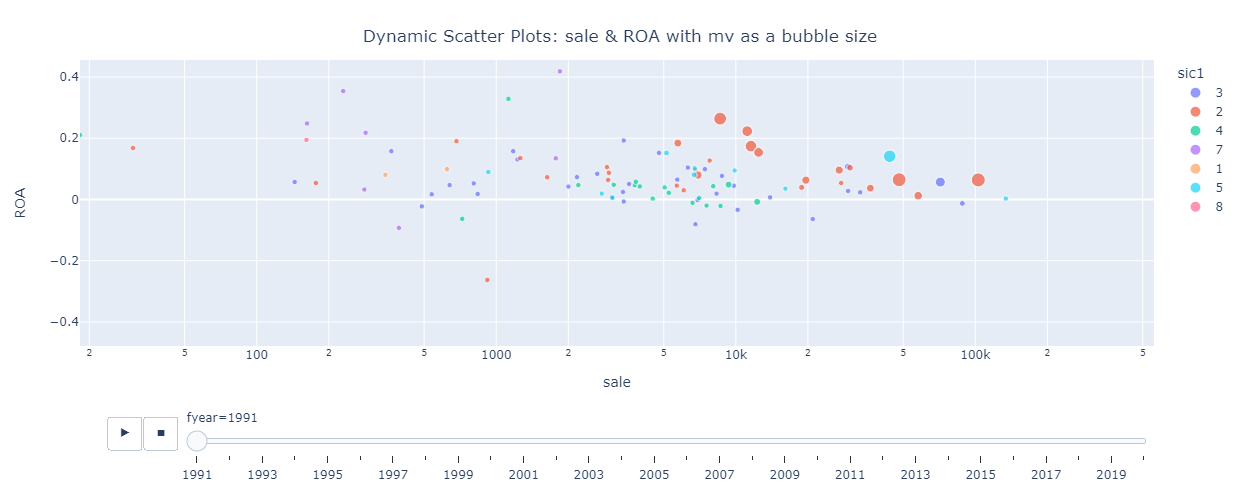

In [20]:
xcol='sale'
ycol='ROA'

# Define size variable to be used as a bubble size
bubble_size_base= 'mv'
df['bubble_size']= df[bubble_size_base].clip(df[bubble_size_base].quantile(0.3),)

fig=px.scatter(df, x=xcol, y=ycol,
              animation_frame='fyear',
              animation_group='conm',
              height= 500, width= 1000,
              range_x=[min(df[xcol]), max(df[xcol])],
              range_y=[min(df[ycol]), max(df[ycol])],
               size='bubble_size', 
               size_max= 50,
               log_x= True,
               color='sic1',
              hover_name= 'conm'
              )

fig.update_layout(
    title={
        'text': f"Dynamic Scatter Plots: {xcol} & {ycol} with {bubble_size_base} as a bubble size",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

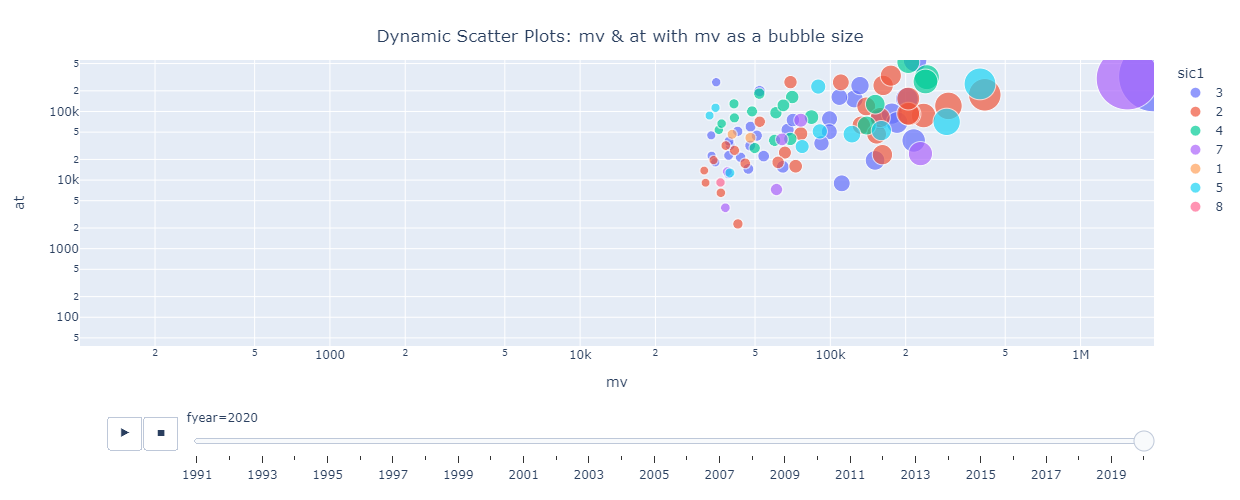

In [19]:
xcol='mv'
ycol='at'

# Define size variable to be used as a bubble size
bubble_size_base= 'mv'
df['bubble_size']= df[bubble_size_base].clip(df[bubble_size_base].quantile(0.3),)

fig=px.scatter(df, x=xcol, y=ycol,
              animation_frame='fyear',
              animation_group='conm',
              height= 500, width= 1000,
              range_x=[min(df[xcol]), max(df[xcol])],
              range_y=[min(df[ycol]), max(df[ycol])],
               size='bubble_size', 
               size_max= 50,
               log_x= True, # Log transformation for x
               log_y= True, # Log transformation for y
               color='sic1',
              hover_name= 'conm'
              )

fig.update_layout(
    title={
        'text': f"Dynamic Scatter Plots: {xcol} & {ycol} with {bubble_size_base} as a bubble size",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [22]:
fig.write_html('dynamic-scatter-mv-at.html', auto_play= False)

----------------